# Problem set 3

Ashley Borjon 

Role of Race in ADHD Management

March 4, 2024

In [1]:
cd "/Users/aborjon/Desktop/stats2/soc211"

/Users/aborjon/Desktop/stats2/soc211


In [2]:
log using "Problem Set 3.log", replace

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/aborjon/Desktop/stats2/soc211/Problem Set 3.log
  log type:  text
 opened on:   7 Mar 2024, 16:03:25


In [3]:
set more off 

(-set more- irrelevant in this version of Stata)


In [7]:
insheet using /Users/aborjon/Desktop/stats2/soc211/ProblemSet3/loanrepay2013_highestresearch.csv, clear

(19 vars, 33 obs)


In [8]:
ds

opeid         instnm        all_under     sgrnt_low_~c  xstring
acceptrate    stabbr        netprice4l~e  igrnt_low_~c  ystring
y_lo_inc_rpy  hgroup        spend_ugd_~w  sandigrnt_~c  markerlabel
lo_inc_deb~n  upgrntn       x_aid_byst~r  instatetui~n


In [9]:
codebook


-------------------------------------------------------------------------------
opeid                                                               (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (long)

                 Range: [108300,396900]               Units: 100
         Unique values: 33                        Missing .: 0/33

                  Mean:  234748
             Std. dev.: 92830.2

           Percentiles:     10%       25%       50%       75%       90%
                         131400    153500    210300    309000    374500

-------------------------------------------------------------------------------
acceptrate                                                          (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [.21463495,.91753805]         Units: 1.000e-08
         Unique values:

In [10]:
sum lo_inc_debt_mdn spend_ugd_4yr_low 


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
lo_inc_deb~n |         33    13481.14    2160.799   9519.867   17844.37
spend_ugd_~w |         33     2092.09     1505.81   2.182507   4222.835


In [11]:
xtile spendquant = spend_ugd_4yr_low, nq(5)

In [12]:
sum spend_ugd_4yr_low, detail
tab spendquant


                      spend_ugd_4yr_low
-------------------------------------------------------------
      Percentiles      Smallest
 1%     2.182507       2.182507
 5%     127.7586       127.7586
10%     329.1107       127.7586       Obs                  33
25%     453.6433       329.1107       Sum of wgt.          33

50%     2259.464                      Mean            2092.09
                        Largest       Std. dev.       1505.81
75%     3182.643        4156.29
90%      4156.29        4156.29       Variance        2267464
95%      4156.29        4156.29       Skewness        .067065
99%     4222.835       4222.835       Kurtosis       1.561742

5 quantiles |
         of |
spend_ugd_4 |
     yr_low |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          7       21.21       21.21
          2 |          7       21.21       42.42
          3 |          7       21.21       63.64
          4 |         11       33.33       96.

In [13]:
%head lo_inc_debt_mdn spend_ugd_4yr_low spendquant

,lo_inc_debt_mdn,spend_ugd_4yr_low,spendquant
1,12417.22,453.6433,2
2,13589.4,4156.29,4
3,11037.53,4156.29,4
4,12486.75,4156.29,4
5,12445.92,4156.29,4


In [14]:
%tail lo_inc_debt_mdn spend_ugd_4yr_low spendquant

,lo_inc_debt_mdn,spend_ugd_4yr_low,spendquant
29,15976.82,2622.608,3
30,9933.774,2678.626,4
31,11455.85,3679.734,4
32,15176.6,1314.106,2
33,12831.13,2140.77,3


In [15]:
sum spend_ugd_4yr_low if spendquant==3


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
spend_ugd_~w |          7    2442.098    211.8824    2140.77   2622.608


(bin=5, start=2.182507, width=487.98308)
(bin=5, start=0, width=356.14739)


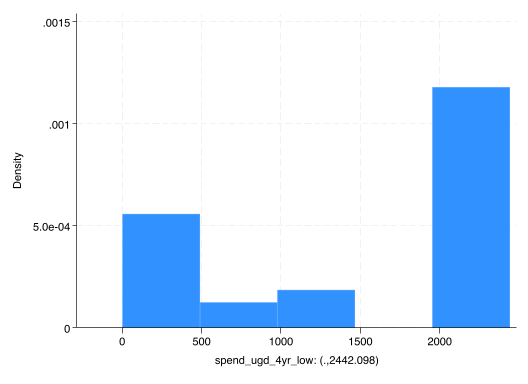

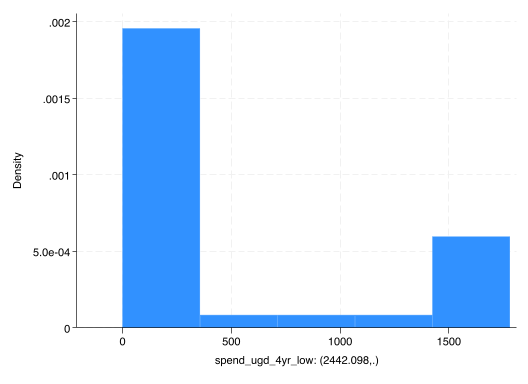

In [17]:
*drop spendugd1 
*drop spendugd2 

mkspline spendugd1 2442.098 spendugd2 = spend_ugd_4yr_low

histogram spendugd1, name(hist1)
histogram spendugd2, name(hist2)

In [47]:
reg lo_inc_debt_mdn spendugd1 spendugd2
predict yhat

tw (scatter lo_inc_debt_mdn spend_ugd_4yr_low) (line yhat spend_ugd_4yr_low, sort color(purple) lwidth(thick))


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(2, 30)        =      0.19
       Model |  1895817.11         2  947908.556   Prob > F        =    0.8257
    Residual |   147513833        30  4917127.75   R-squared       =    0.0127
-------------+----------------------------------   Adj R-squared   =   -0.0531
       Total |   149409650        32  4669051.55   Root MSE        =    2217.5

------------------------------------------------------------------------------
lo_inc_deb~n | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   spendugd1 |   .1261063   .4996979     0.25   0.802    -.8944129    1.146626
   spendugd2 |  -.4200471   .6930687    -0.61   0.549    -1.835482    .9953881
       _cons |   13478.82   768.3977    17.54   0.000     11909.54     15048.1
--------------------------------------------------

In [48]:
mkspline spendugd3 = spend_ugd_4yr_low, cubic displayknots

variable spendugd31 already defined
r(110);


In [49]:
regress lo_inc_debt_mdn spendugd3*


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(4, 28)        =      1.10
       Model |  20282006.3         4  5070501.58   Prob > F        =    0.3762
    Residual |   129127643        28  4611701.55   R-squared       =    0.1357
-------------+----------------------------------   Adj R-squared   =    0.0123
       Total |   149409650        32  4669051.55   Root MSE        =    2147.5

------------------------------------------------------------------------------
lo_inc_deb~n | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
  spendugd31 |  -4.877568   2.584709    -1.89   0.070    -10.17211    .4169697
  spendugd32 |   140.0925   69.42419     2.02   0.053    -2.116502    282.3015
  spendugd33 |  -172.5078    85.9981    -2.01   0.055    -348.6669    3.651316
  spendugd34 |   79.96149   49.60217     1.61   0.

In [54]:
predict yhat2

variable yhat2 already defined
r(110);


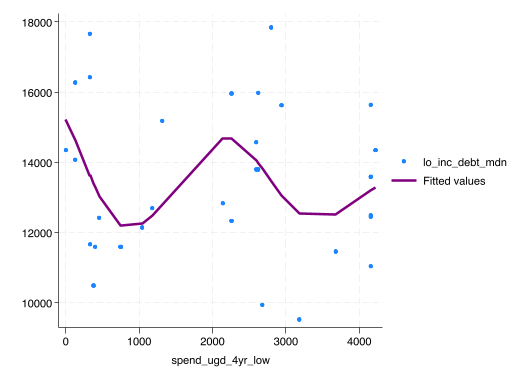

In [55]:
tw (scatter lo_inc_debt_mdn spend_ugd_4yr_low) (line yhat2 spend_ugd_4yr_low, sort color(purple) lwidth(thick))

In [57]:
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(2)) ///
se(fmt(2) par)) nobase

(tabulating estimates stored by eststo; specify "." to tabulate the active resu
> lts)

-------------------------------------------------------------------------------
> -----------------------------------------------------------------------------
> -----------------------------------------------------------------------------
> ---
                      (1)             (2)             (3)             (4)      
>        (5)             (6)             (7)             (8)             (9)   
>          (10)            (11)            (12)            (13)            (14)
>    
             lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n    lo
> _inc_deb~n    lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n   
>  lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n
>    
                     b/se            b/se            b/se            b/se      
>       b/se            b/se            b/se            b/se            b/se   
>          b/s

In [52]:
gen spendugdquad = spend_ugd_4yr_low^2

variable spendugdquad already defined
r(110);


In [53]:
regress lo_inc_debt_mdn spend_ugd_4yr_low spendugdquad


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(2, 30)        =      0.07
       Model |  668305.998         2  334152.999   Prob > F        =    0.9350
    Residual |   148741344        30  4958044.79   R-squared       =    0.0045
-------------+----------------------------------   Adj R-squared   =   -0.0619
       Total |   149409650        32  4669051.55   Root MSE        =    2226.7

------------------------------------------------------------------------------
lo_inc_deb~n | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
spend_ugd_~w |    .015965   1.044832     0.02   0.988    -2.117867    2.149797
spendugdquad |  -.0000252   .0002362    -0.11   0.916    -.0005075    .0004571
       _cons |   13613.22   875.7008    15.55   0.000      11824.8    15401.64
--------------------------------------------------

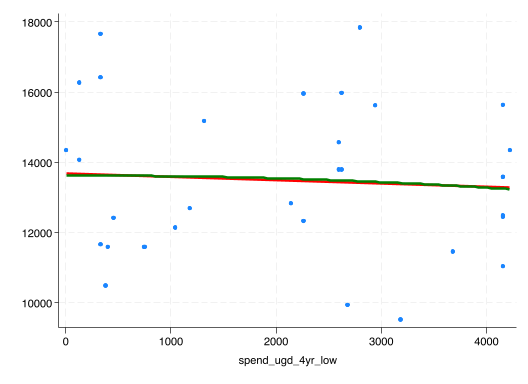

In [25]:
tw (scatter lo_inc_debt_mdn spend_ugd_4yr_low, sort) ///
(lfit lo_inc_debt_mdn spend_ugd_4yr_low, color(red) lwidth(thick)) ///
(qfit lo_inc_debt_mdn spend_ugd_4yr_low, color(green) lwidth(thick)), ///
legend(off) name(quadratic, replace)

In [26]:
gen loggeddebtmdn=log10(lo_inc_debt_mdn)

In [27]:
reg loggeddebtmdn spend_ugd_4yr_low


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =      0.10
       Model |  .000519343         1  .000519343   Prob > F        =    0.7502
    Residual |  .156074017        31  .005034646   R-squared       =    0.0033
-------------+----------------------------------   Adj R-squared   =   -0.0288
       Total |  .156593361        32  .004893543   Root MSE        =    .07096

------------------------------------------------------------------------------
loggeddebt~n | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
spend_ugd_~w |  -2.68e-06   8.33e-06    -0.32   0.750    -.0000197    .0000143
       _cons |    4.12989   .0213603   193.34   0.000     4.086325    4.173454
------------------------------------------------------------------------------


In [28]:
predict yhat3
replace yhat3=10^(yhat3)

qui regress lo_inc_debt_mdn spend_ugd_4yr_low
predict yhat4, xb

(option xb assumed; fitted values)
(33 real changes made)


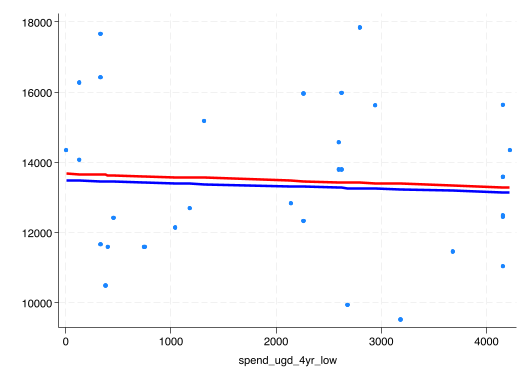

In [29]:
tw (scatter lo_inc_debt_mdn spend_ugd_4yr_low) ///
(line yhat4 spend_ugd_4yr_low, sort color(red) lwidth(thick)) ///
(line yhat3 spend_ugd_4yr_low, sort color(blue) lwidth(thick)), legend(off)

In [30]:
sum lo_inc_debt_mdn, detail


                       lo_inc_debt_mdn
-------------------------------------------------------------
      Percentiles      Smallest
 1%     9519.867       9519.867
 5%     9933.774       9933.774
10%     11037.53       10485.65       Obs                  33
25%     11661.15       11037.53       Sum of wgt.          33

50%     13581.13                      Mean           13481.14
                        Largest       Std. dev.      2160.799
75%      15176.6       16269.87
90%     16269.87       16422.74       Variance        4669052
95%     17660.04       17660.04       Skewness       .2221317
99%     17844.37       17844.37       Kurtosis       2.260013


## 1. Develop hypotheses about two non-linear relationships [1 pt]

You can use the GSS data, Student aid data, or your own data. Develop at least 2 hypotheses about non-linear relationships in your dataset of choice that do the following:

    A. Use the form: The DV will change positive/negatively if the IV changes positively/negatively/categorically (specify what the variables measure and what the categories are if you have a categorical hypothesis)
    
H1: The dependent variable lo_inc_debt_mdn (which I think means the median debt for students who attend college that are low income), will have a negative association with spend_ugd_4yr_low (the amount a university spends on low income students over a 4 year period).

H2: The dependent variable lo_inc_debt_mdn (which I think means the median debt for students who attend college that are low income),will have a positive association with spend_ugd_4yr_low (the amount a university spends on low income students over a 4 year period).  

    B. State if you expect each hypothesized relationship will be linear or take one of the 5 non-linear forms (1. nominal, 2. sequential dummies, 3. splines, 4. quadratic, 5. logarithmic). You tell us at least two different non-linear forms that you think your hypothesized relationships will or will not take.
    
I hypothesize that H1 will have a cubic spline relationship. 
I hypothesize that H2 will have a non-linear spline relationship. 

    C. State your explanation why (theory) you make the predictions in A. and B.
    
I think that with my prediction for H1 it is because the more a school pays over time, the less debt that student will accrue. 
I think that H2 would happen because the amount of loans that a student gets will increase over time but so will costs for the institution causing the colleges to spend more.

    D. Tell us the source of your data and describe its sample.
    
My data is the loanrepay data from Dr. Charlie Eaton. This data was collected in 2013 that collects and compares information for financial aid for students with that of institutions of higher education in the US. 

## 2. Conduct statistical tests for your hypothesized relationship: [3 pts]

* Estimate at least 2 different types of non-linear models that test your hypotheses.

* Use appropriate regression and graphical representations to represent each model.

* Use esttab to compare between types of non-linear and linear models

In [44]:
eststo: reg lo_inc_debt_mdn spendugd1 spendugd2 
predict yhat6



      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(2, 30)        =      0.19
       Model |  1895817.11         2  947908.556   Prob > F        =    0.8257
    Residual |   147513833        30  4917127.75   R-squared       =    0.0127
-------------+----------------------------------   Adj R-squared   =   -0.0531
       Total |   149409650        32  4669051.55   Root MSE        =    2217.5

------------------------------------------------------------------------------
lo_inc_deb~n | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   spendugd1 |   .1261063   .4996979     0.25   0.802    -.8944129    1.146626
   spendugd2 |  -.4200471   .6930687    -0.61   0.549    -1.835482    .9953881
       _cons |   13478.82   768.3977    17.54   0.000     11909.54     15048.1
--------------------------------------------------

In [58]:
esttab

(tabulating estimates stored by eststo; specify "." to tabulate the active resu
> lts)

-------------------------------------------------------------------------------
> -----------------------------------------------------------------------------
> -----------------------------------------------------------------------------
> ---
                      (1)             (2)             (3)             (4)      
>        (5)             (6)             (7)             (8)             (9)   
>          (10)            (11)            (12)            (13)            (14)
>    
             lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n    lo
> _inc_deb~n    lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n   
>  lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n    lo_inc_deb~n
>    
-------------------------------------------------------------------------------
> -----------------------------------------------------------------------------
> ------------

## 3. Interpret the results [1 pt]

    A. Say whether the results support or contradict your hypothesis and why
    
My hypotheses H1 is supported by the cubic spline interpretation this model is representative of the data but it does not show a positive relationship. My H2 hypothesis was looked at with a non-linear spline which was not a good fit and I was not able to make sense of the dat, 
    
    B. Say whether a linear or particular non-linear model best describes your data and why

A non-linear cubic spline model best describes my data. With the non-linear spline there was difficulty in interpretation, this could be because of assumptions I made for where the knots were on the spline. 

In [ ]:
capture, log close 